# Feature Selection

- In this notebook we will be looking at how much each feature contributes to the Output Y.
- We will then remove the non-important features and test if this helps improve the model.

In [2]:
#setup

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.linear_model


data = pd.read_csv('../data/Auto.csv')
data.set_index('name', inplace=True)
X = data.drop('mpg', axis=1)
y = data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
# before feature selection
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
adjusted_r2_before = 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Adjusted R^2 before feature selection: {adjusted_r2_before:.4f}')

Adjusted R^2 before feature selection: 0.7695


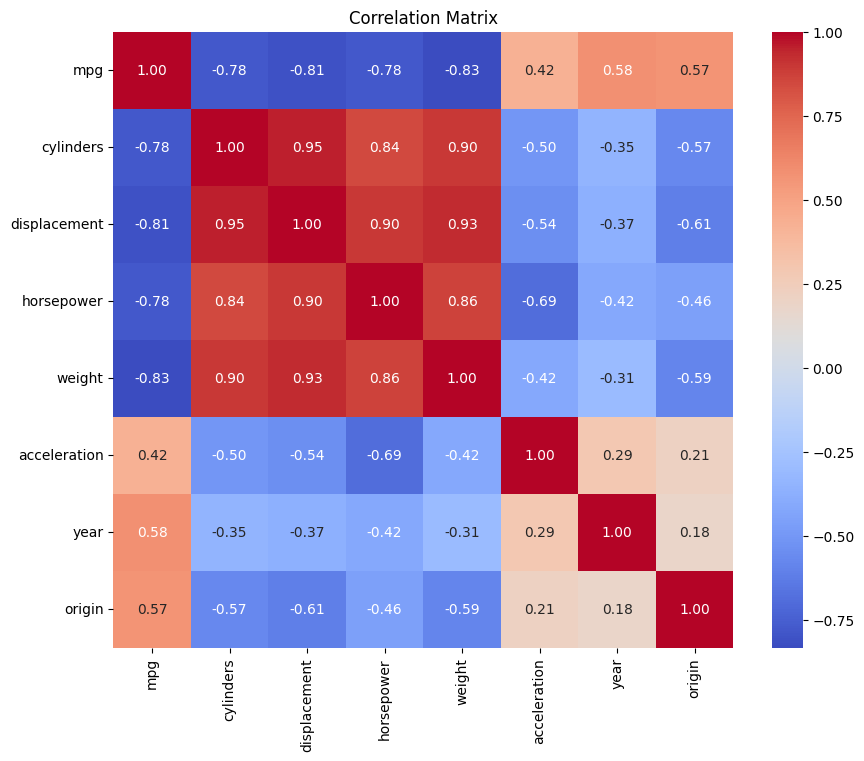

In [16]:
# feature selection from correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Based on the correlation matrix, we will select the following features:
selected_features = ['weight', 'horsepower', 'displacement', 'cylinders','year']

In [17]:
# after feature selection

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = sklearn.linear_model.LinearRegression()
model.fit(X_train_selected, y_train)
adjusted_r2_after = 1 - (1 - model.score(X_test_selected, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test_selected.shape[1] - 1)
print(f'Adjusted R^2 after feature selection: {adjusted_r2_after:.4f}')


Adjusted R^2 after feature selection: 0.7790


## Notes
R^2 will always be the same or increase as number of features increases.
This is why I have used adjusted R^2.